### Table of Contents
- [Introduction](#introduction)
- [1. Loading dataset and libraries](#loading)
- [2. Preprocessing](#preprocessing)
    - [2.1 Rename columns](#rename-columns)
    - [2.2 Data types](#data-types)
    - [2.2 Missing values](#missing-values)
    - [2.3 Duplicated data](#duplicated-data)
- [3. Statistical description](#statistical)
    - [3.1 Description](#description)
    - [3.2 Scatter Plots, Clustering and Data Exploration](#exploration)
- [4. Models](#models)
    - [4.1 Data splitting](#splitting)
    - [4.2 Model Evaluation](#evaluation)
        - [4.2.1 RMSE](#rmse)
        - [4.2.2 R2](#r2)
        - [4.2.3 Repeated k-Fold Cross-Validation](#kfold)
    - [4.3 Linear Regression](#linear-regression)
    - [4.4 Polynomial Regression](#polynomial-regression)
    - [4.5 Lasso Regression](#lasso-regression)
    - [4.6 Decision Tree Regression](#decision-tree-regression)
    - [4.7 Random Forest Regression](#random-forest-regression)
    - [4.8 Support Vector Regression](#support-vector-regression)
    - [4.9 Bayesian Ridge Regression](#bayesian-ridge-regression)
    - [4.10 Ridge Regression](#ridge-regression)
    - [4.11 ElasticNet Regression](#elasticnet-regression)
    - [4.12 Scores Comparison](#scores-comparison)
- [5. Feature extraction](#feature-extraction)
    - [5.1 Correlation heatmap](#correlation-heatmap)

## Introduction <a name="introduction" />
### Energy efficiency

### Features
1. **X1 - A - Relative Compactness**\
This value is obtained by the sum of all surfaces of its envelope, divided by its gross heated volume.\
The Rc of a shape is derived in that its volume to surface ratio is compared to that of the most compact shape with the same volume.    
2. X2 - B - Surface Area
3. X3 - C - Wall Area
4. X4 - D - Roof Area
5. X5 - E - Overall Height
6. X6 - F - Orientation
7. X7 - G - Glazing Area
8. X8 - H - Glazing Area Distribution

### Output (target values)
- y1 Heating Load
- y2 Cooling Load

## 1. Loading dataset and libraries <a name="loading" />

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

df = pd.read_csv("en_eff.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [270]:
df.shape

(768, 10)

Vidimo da imamo 768 rows i 10 columns, features, sto se uklapa sa opisom dataseta.

## 2. Preprocessing <a name="preprocessing"/>

### 2.1 Rename columns  <a name="rename-columns"/>

In [271]:
df.columns = ['relative_compactness', 
              'surface_area', 
              'wall_area', 
              'roof_area', 
              'overall_height', 
              'orientation', 
              'glazing_area', 
              'glazing_distribution', 
              'heating_load', 
              'cooling_load']
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### 2.2 Data types  <a name="data-types"/>

In [272]:
df.dtypes

relative_compactness    float64
surface_area            float64
wall_area               float64
roof_area               float64
overall_height          float64
orientation               int64
glazing_area            float64
glazing_distribution      int64
heating_load            float64
cooling_load            float64
dtype: object

Potvrdjujemo da se radi samo sa brojevima, realni i celi brojevi.

### 2.3 Missing values  <a name="missing-values"/>

In [273]:
df.isnull().any()

relative_compactness    False
surface_area            False
wall_area               False
roof_area               False
overall_height          False
orientation             False
glazing_area            False
glazing_distribution    False
heating_load            False
cooling_load            False
dtype: bool

Proveravamo da li ima nekih NaN vrednosti. Zakljucak je da nema takvih vrednosti.

### 2.3 Duplicated data  <a name="duplicated-data"/>

In [274]:
duplicates = df.duplicated().sum()
duplicates

0

Proveravamo da li ima nekih duplih vrednosti, misli se na duplirane redove. Zakljucak je da nema dupliranih redova u datasetu.

## 3. Statistical Description  <a name="statistical"/>

### 3.1 Description <a name="description"/>

In [275]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Moze se primetiti da **max** vrednost za **heating_load** i **cooling_load** ne prelazi **50**. Takodje, **orientation** je izmedju vrednosti **2** i **5** (inkluzivno).\
**glazing_area**, **glazing_distribution**, **relative_compactness**, **overal_height** i **orientation** imaju veoma male vrednosti u odnosu na ostale.

### 3.2 Scatter Plots, Clustering and Data Exploration  <a name="exploration"/>

Uzimamo oba output-a, heating_load i cooling_load, u zavisnosti od prvog featur-a, relative_compactness.

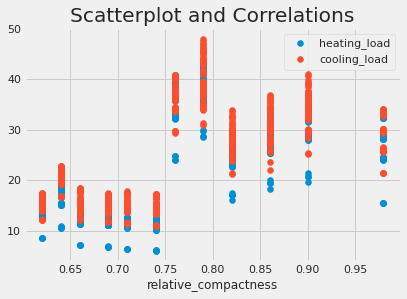

In [276]:
plt.scatter(df.relative_compactness, df.heating_load, label='heating_load')
plt.scatter(df.relative_compactness, df.cooling_load, label='cooling_load')

plt.title('Scatterplot and Correlations')
plt.xlabel('relative_compactness', fontsize=12)
plt.legend()
plt.show()

Ovde je predstavljena zavisnost heating_load i cooling_load od relative_compactness. Mozemo primetiti da postoje jasne grupacije, clusteri podataka. U primeru koji koristimo moze se primetiti da postoji 12 grupa u koje se moze podeliti relative_compactness.

Pod pretpostavkom da i ostale kolone sadrze odredjene "klase" u sebi, mozemo izvuci sve unique vrednosti iz svih kolona kao brzi test.

#### Number of uniques per column:

In [277]:
for c in df.columns:
    print("Number of unique values in {}: {}".format(c, len(df[c].unique())))

Number of unique values in relative_compactness: 12
Number of unique values in surface_area: 12
Number of unique values in wall_area: 7
Number of unique values in roof_area: 4
Number of unique values in overall_height: 2
Number of unique values in orientation: 4
Number of unique values in glazing_area: 4
Number of unique values in glazing_distribution: 6
Number of unique values in heating_load: 586
Number of unique values in cooling_load: 636


#### Unique values per column: 

In [278]:
for c in df.columns:
    print("Unique values in {}: {}".format(c, df[c].unique()))

Unique values in relative_compactness: [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
Unique values in surface_area: [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
Unique values in wall_area: [294.  318.5 343.  416.5 245.  269.5 367.5]
Unique values in roof_area: [110.25 122.5  147.   220.5 ]
Unique values in overall_height: [7.  3.5]
Unique values in orientation: [2 3 4 5]
Unique values in glazing_area: [0.   0.1  0.25 0.4 ]
Unique values in glazing_distribution: [0 1 2 3 4 5]
Unique values in heating_load: [15.55 20.84 21.46 20.71 19.68 19.5  19.95 19.34 18.31 17.05 17.41 16.95
 15.98 28.52 29.9  29.63 28.75 24.77 23.93  6.07  6.05  6.01  6.04  6.37
  6.4   6.85  6.79  6.77  6.81  7.18  7.1  10.85 10.54 10.77 10.56  8.6
  8.49  8.45  8.5  24.58 24.63 24.59 29.03 29.87 29.14 28.09 26.28 26.91
 26.37 25.27 23.53 24.03 23.54 22.58 35.56 37.12 36.9  35.94 32.96 32.12
 32.94 32.21 10.36 10.43 10.39 10.71 10.8  10.7  10.75 11.11 11.13 11.09
 11.16 

Ovaj rezultat potvrdjuje pretpostavku da sve kolone, sem naravno output kolona heating_load i cooling_load, imaju u sebi odredjene klastere ili "klase". Drugim recima, svi nasi ulazni parametri imaju svoje podele/klase unutar sebe. Tako npr. vidimo da relative_compactness ima 12 razlicitih vrednosti, orientation 4 itd. Posto znamo da je ukupan broj redova 768, vidimo da cak i heating/cooling load imaju neke duplikate, odnosno da se neke vrednosti ponavljaju, jer nema 768 uniques.

Posto smo ovo videli, sada mozemo vizuelno da proverimo svaku od njih, redom od prvog do poslednjeg feature.\
Za ovo cemo iskoristiti seaborn i hue parametar. Po x i y osama ce uvek biti output vrednosti, cooling_load i heating_load, respektivno, dok ce se raspodela i potencijalna zavisnost i grupacije videti kroz hue vrednost.

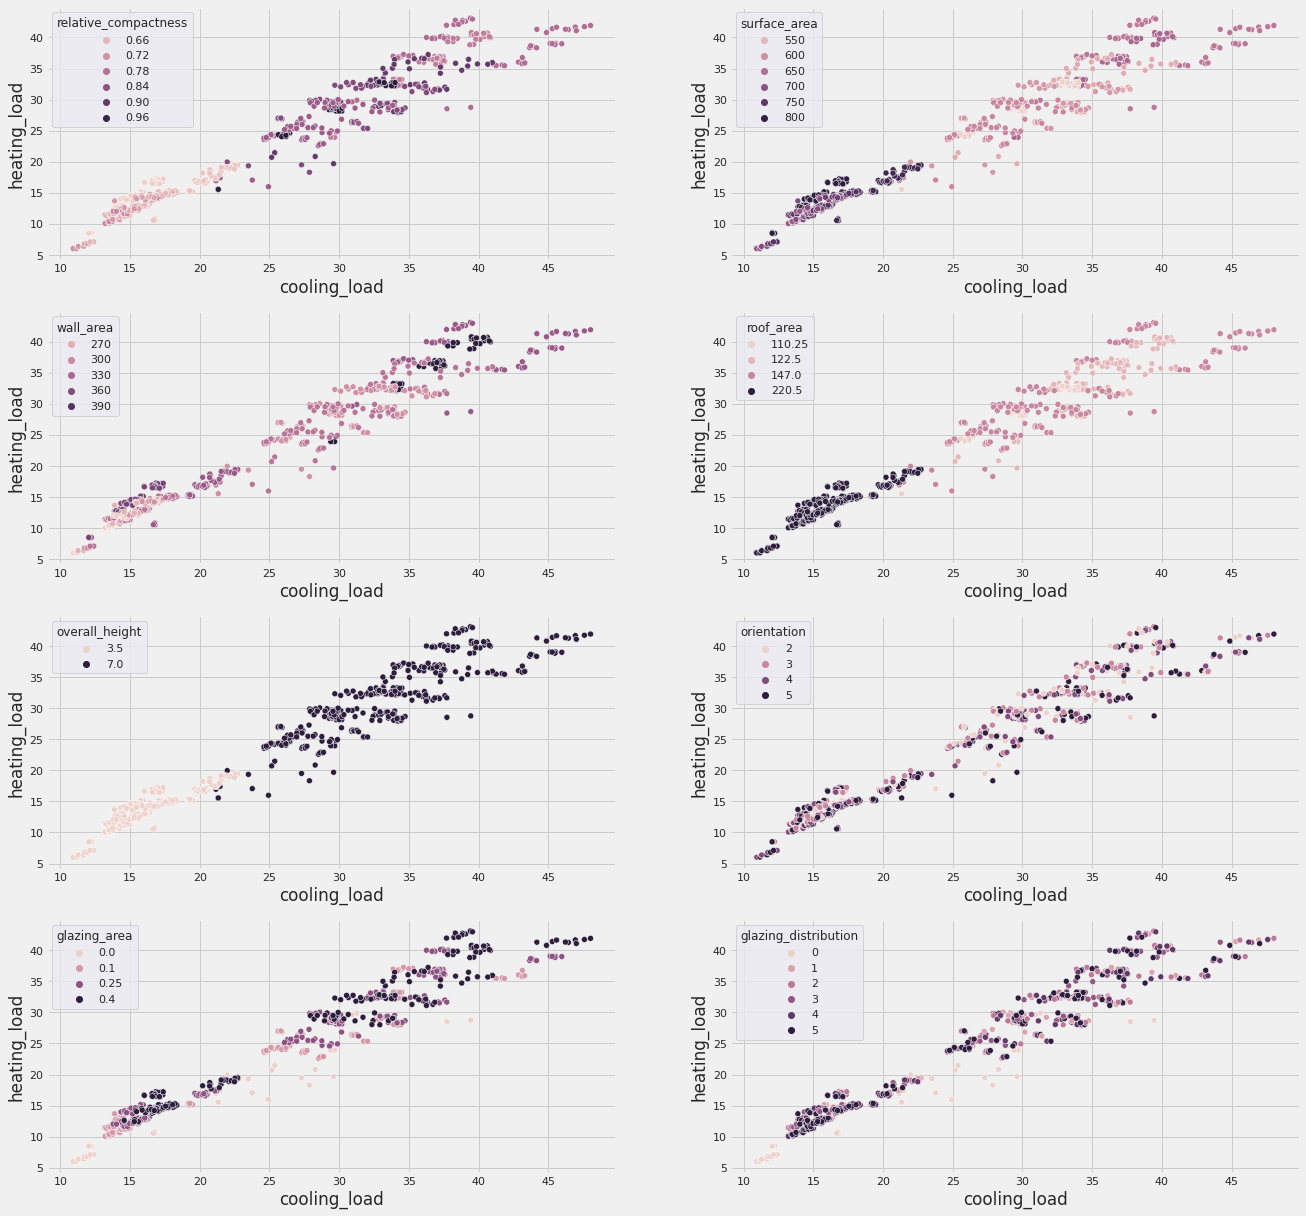

In [279]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

sns.set_theme(style='darkgrid')
sns.scatterplot(ax=ax[0][0], x=df.cooling_load, y=df.heating_load, hue=df.relative_compactness, data=df)
sns.scatterplot(ax=ax[0][1], x=df.cooling_load, y=df.heating_load, hue=df.surface_area, data=df)
sns.scatterplot(ax=ax[1][0], x=df.cooling_load, y=df.heating_load, hue=df.wall_area, data=df)
sns.scatterplot(ax=ax[1][1], x=df.cooling_load, y=df.heating_load, hue=df.roof_area, data=df)
sns.scatterplot(ax=ax[2][0], x=df.cooling_load, y=df.heating_load, hue=df.overall_height, data=df)
sns.scatterplot(ax=ax[2][1], x=df.cooling_load, y=df.heating_load, hue=df.orientation, data=df)
sns.scatterplot(ax=ax[3][0], x=df.cooling_load, y=df.heating_load, hue=df.glazing_area, data=df)
sns.scatterplot(ax=ax[3][1], x=df.cooling_load, y=df.heating_load, hue=df.glazing_distribution, data=df)

plt.show()

Na osnovu ovog eksperimenta mozemo primetiti da postoje odredjene grupacije ili klasteri. To su one slike gde se najjasnije moze razlikovati neka grupa tacaka, na osnovu hue vrednosti, boje. To su grafici sa sledecim atributima hue vrednosti:
1. **relative_compactness** (u donjem levom uglu se izdvaja grupa, koja oznacava da manje vrednosti relative_compactness-a proizvode manje vrednosti cooling i heating load)
2. **surface_area** (u donjem levom uglu se izdvaja grupa, koja oznacava da vece vrednosti surface_area proizvode manje vrednosti cooling i heating load)
3. **roof_area** (u donjem levom uglu se izdvaja grupa, koja oznacava da vece vrednosti roof_area proizvode manje vrednosti cooling i heating load)
4. **overall_height** (na osnovu prethodnih eksperimenata, utvrdili smo da postoje samo 2 visine koje se pominju u datasetu. Ovde se zbog toga mozda i najjasnije vide grupe. Takodje, kao i kod prethodnih, u donjem levom uglu se jasno izdvaja grupa koja ukazuje na to da za manje vrednosti overall_height imamo manje vrednosti output-a)

Sve gore pomenute 4 slike imaju istu osobinu. Sve grupe su izdvojene tako da su "ogranicene" heating vrednoscu 20, i cooling vrednoscu oko 22-23.\
Sa druge strane, heating load i cooling load u direktoj vezi, za povecanje jednog - povecava se i drugo, sto je i ocekivano.
To mozemo pokazati na sledeci nacin.

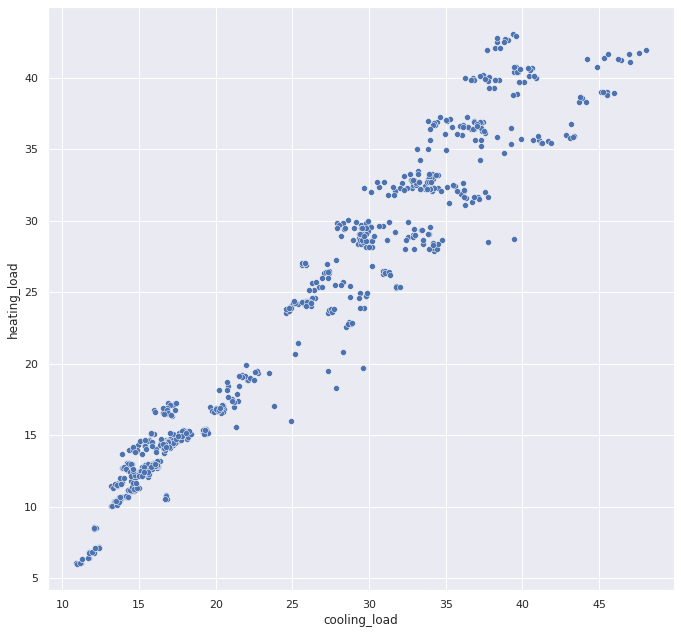

In [280]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_theme(style='darkgrid')
sns.scatterplot(x=df.cooling_load, y=df.heating_load, data=df)

plt.show()

Na osnovu slike iznad, vidimo da su heating i cooling load u direktnoj vezi. Postoji skoro linearna zavisnost. Drugim recima, povecanje heating vrednosti skoro linearno utice utice na povecanje cooling vrednosti i obrnuto. 

## 4. Models <a name="models"/>

### 4.1 Splitting <a name="splitting"/>

Razdvojicemo dataset u dva data seta. Prvi, koji ce sluziti za treniranje ce biti 80% od ukupnog, dok ce drugi (preostalih 20%) biti iskoriscen za testiranje.

In [282]:
from sklearn.model_selection import train_test_split
X = df[['relative_compactness', 
        'surface_area', 
        'wall_area', 
        'roof_area', 
        'overall_height', 
        'orientation', 
        'glazing_area', 
        'glazing_distribution']]
Y = df[['heating_load']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) # random_state controls the shuffling applied to the data before applying the split

Provera velicine dataseta:

In [283]:
print("Ceo dataset X: {}".format(X.shape))
print("Ceo dataset Y: {}".format(Y.shape))
print("X dataset za treniranje X_train: {}".format(X_train.shape))
print("X dataset za testiranje X_test: {}".format(X_test.shape))
print("Y dataset za treniranje Y_train: {}".format(Y_train.shape))
print("Y dataset za testiranje Y_test: {}".format(Y_test.shape))

Ceo dataset X: (768, 8)
Ceo dataset Y: (768, 1)
X dataset za treniranje X_train: (614, 8)
X dataset za testiranje X_test: (154, 8)
Y dataset za treniranje Y_train: (614, 1)
Y dataset za testiranje Y_test: (154, 1)


### 4.2 Model evaluation  <a name="evaluation"/>

#### 4.2.1 RMSE <a name="rmse"/>
$$RMSE = \sqrt{\frac {1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2}$$

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. A perfect RMSE value is 0.0, which means that all predictions matched the expected values exactly.

#### 4.2.2 R2_score (R squared score) <a name="r2"/>
$$R^2 = 1 - \frac{SumSquaredRegression}{TotalSumOfSquares} = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y_i})^2}$$

The SumSquaredRegression is the sum of the residuals squared, and the total sum of squares is the sum of the distance the data is away from the mean all squared. As it is a percentage it will take values between 0 and 1.

The coefficient of determination, or R squared, is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data. It is therefore important when a statistical model is used either to predict future outcomes or in the testing of hypotheses. There are a number of variants (see comment below); the one presented here is widely used

#### 4.2.3 Repeated k-Fold Cross-Validation  <a name="kfold"/>

The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held back test set, whilst all other folds collectively are used as a training dataset. A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported.
$$MAE = \frac{\sum_{i=1}^{n}abs({y_i - \lambda(x_i)})}{n}$$
Given any test data-set, Mean Absolute Error of your model refers to the mean of the absolute values of each prediction error on all instances of the test data-set. Prediction error is the difference between the actual value and the predicted value for that instance.
Statistically, Mean Absolute Error (MAE) refers to a the results of measuring the difference between two continuous variables. Let’s assume variables M and N represent the same phenomenon but have recorded different observations.

In [284]:
model_perfs = {}
def RepeatedKFoldPerf(m, x, y):
    result = ""
    
    # Repeated k-Fold Cross=Validation MAE
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(m, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    scores = absolute(scores)
    result += 'MAE: %.3f (%.3f)' % (mean(scores), std(scores))
    
    return result

### 4.3 Linear Regression  <a name="linear-regression"/>

In [285]:
lin_model = LinearRegression()

print("RKFold performance {}".format(RepeatedKFoldPerf(lin_model, X, Y)))

lin_model.fit(X_train, Y_train)
print("R2 score: {}".format(lin_model.score(X_test, Y_test)))
model_perfs['linear'] = lin_model.score(X_test, Y_test)

RKFold performance MAE: 2.085 (0.260)
R2 score: 0.921854284088875


### 4.4 Polynomial Regression  <a name="polynomial-regression"/>

In [286]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
poly_model = LinearRegression()

print("RKFold performance: {}".format(RepeatedKFoldPerf(poly_model, X_poly, Y)))

poly_model.fit(X_train, Y_train)
print("R2 score: {}".format(poly_model.score(X_test, Y_test)))
model_perfs['polynomial'] = poly_model.score(X_test, Y_test)

RKFold performance: MAE: 0.346 (0.042)
R2 score: 0.921854284088875


### 4.5 Lasso Regression  <a name="lasso-regression"/>

In [287]:
lasso_model = Lasso(alpha=0.01)

print("RKFold performance: {}".format(RepeatedKFoldPerf(lasso_model, X, Y)))

lasso_model.fit(X_train, Y_train)
print("R2 score: {}".format(lasso_model.score(X_test, Y_test)))
model_perfs['lasso'] = lasso_model.score(X_test, Y_test)

RKFold performance: MAE: 2.213 (0.240)
R2 score: 0.9175303161178504


### 4.6 Decision Tree Regression  <a name="decision-tree-regression"/>

In [288]:
tree_model = DecisionTreeRegressor()

print("RKFold performance: {}".format(RepeatedKFoldPerf(tree_model, X, Y)))

tree_model.fit(X_train, Y_train)
print("R2 score: {}".format(tree_model.score(X_test, Y_test)))
model_perfs['decision_tree'] = tree_model.score(X_test, Y_test)

RKFold performance: MAE: 0.358 (0.052)
R2 score: 0.9963146481975792


### 4.7 Random Forest Regression  <a name="random-forest-regression"/>

In [289]:
rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)

print("RKFold performance: {}".format(RepeatedKFoldPerf(rf_model, X, Y.values.ravel())))

rf_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(rf_model.score(X_test, Y_test)))
model_perfs['random_forest'] = rf_model.score(X_test, Y_test)

RKFold performance: MAE: 0.312 (0.039)
R2 score: 0.9976633026346274


### 4.8 Support Vector Regression  <a name="support-vector-regression"/>

In [290]:
svr_model = SVR(kernel = 'rbf')

print("RKFold performance: {}".format(RepeatedKFoldPerf(svr_model, X, Y.values.ravel())))

svr_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(svr_model.score(X_test, Y_test)))
model_perfs['support_vector'] = svr_model.score(X_test, Y_test)

RKFold performance: MAE: 3.885 (0.468)
R2 score: 0.7286712123385257


### 4.9 Bayesian Ridge Regression  <a name="bayesian-ridge-regression"/>

In [291]:
bayes_ridge_model = BayesianRidge()

print("RKFold performance: {}".format(RepeatedKFoldPerf(bayes_ridge_model, X, Y.values.ravel())))

bayes_ridge_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(bayes_ridge_model.score(X_test, Y_test)))
model_perfs['bayes_ridge'] = bayes_ridge_model.score(X_test, Y_test)

RKFold performance: MAE: 2.095 (0.257)
R2 score: 0.9209171817646942


### 4.10 Ridge Regression  <a name="ridge-regression"/>

In [292]:
ridge_model = Ridge(alpha=1.0)

print("RKFold performance: {}".format(RepeatedKFoldPerf(ridge_model, X, Y.values.ravel())))

ridge_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(ridge_model.score(X_test, Y_test)))
model_perfs['ridge'] = ridge_model.score(X_test, Y_test)

RKFold performance: MAE: 2.201 (0.242)
R2 score: 0.9181267401815916


### 4.11 ElasticNet Regression  <a name="elasticnet-regression"/>

In [293]:
elastic_model = ElasticNet(alpha=0.01, l1_ratio=1.0)

print("RKFold performance: {}".format(RepeatedKFoldPerf(elastic_model, X, Y.values.ravel())))

elastic_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(elastic_model.score(X_test, Y_test)))
model_perfs['elastic_net'] = elastic_model.score(X_test, Y_test)

RKFold performance: MAE: 2.213 (0.240)
R2 score: 0.9175303161178504


### 4.12 Scores comparison  <a name="scores-comparison"/>

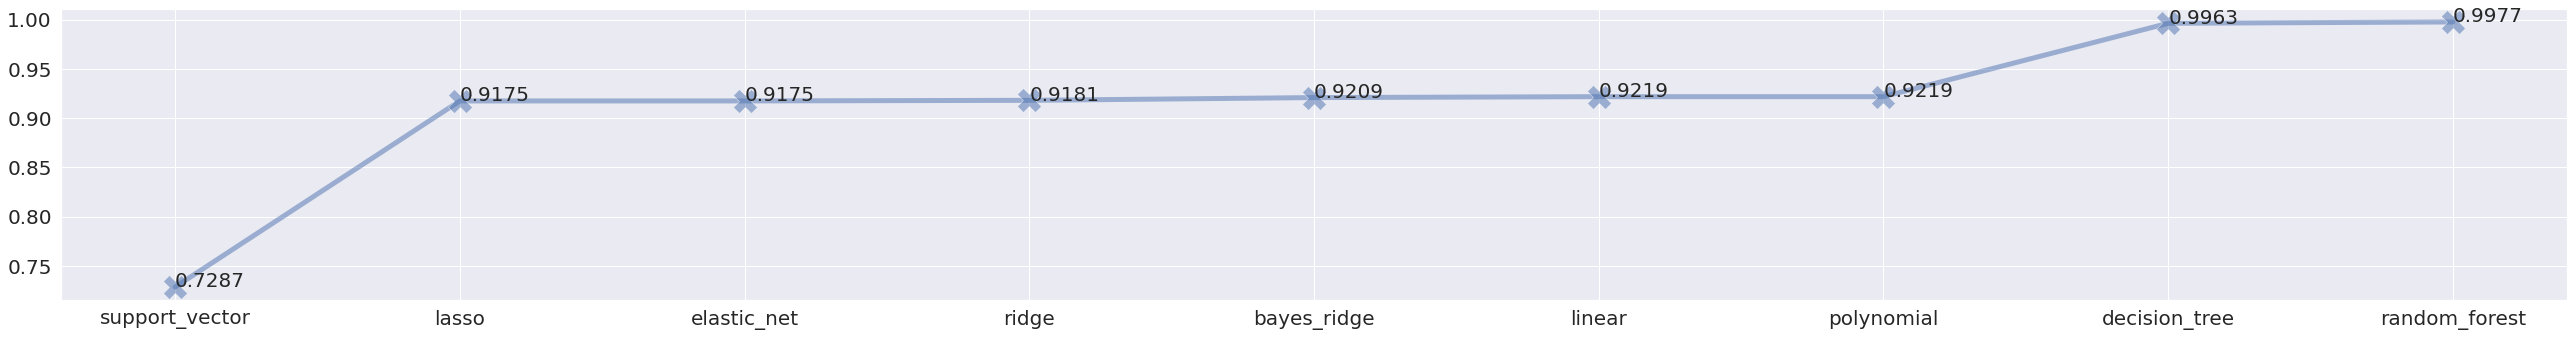

In [294]:
sorted_dict = sorted(model_perfs.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_dict)

fig_dims = (40, 5)
fig, ax = plt.subplots(figsize=fig_dims)

ax.tick_params(labelsize=20)

for key, value in sorted_dict.items():
    ax.text(key, value, value.round(4), size=20)

sns.lineplot(
    data=sorted_dict,
    dashes=False,
    palette="Set1",
    marker="X",
    markersize=24,
    alpha=0.5,
    ax=ax,
    linewidth = 5
)

plt.show()

## 5. Feature Extraction <a name="feature-extraction"/>

### 5.1 Data Correlation  <a name="correlation-heatmap"/>

Kako bismo dalje potvrdili korelaciju izmedju odredjenih atributa, mozemo iskoristiti korelacionu matricu, gde cemo prikazati sve atribute. Vrednosti se krecu od -1 do 1.

**-1** - sto je vrednost bliza -1, jaca je negativna korelacija\
**0** - vrednosti u okolini nule, znace da je korelacija slabija - ne postoji u nuli\
**1** - sto je vrednost bliza jedinici, jaca je pozitivna korelacija

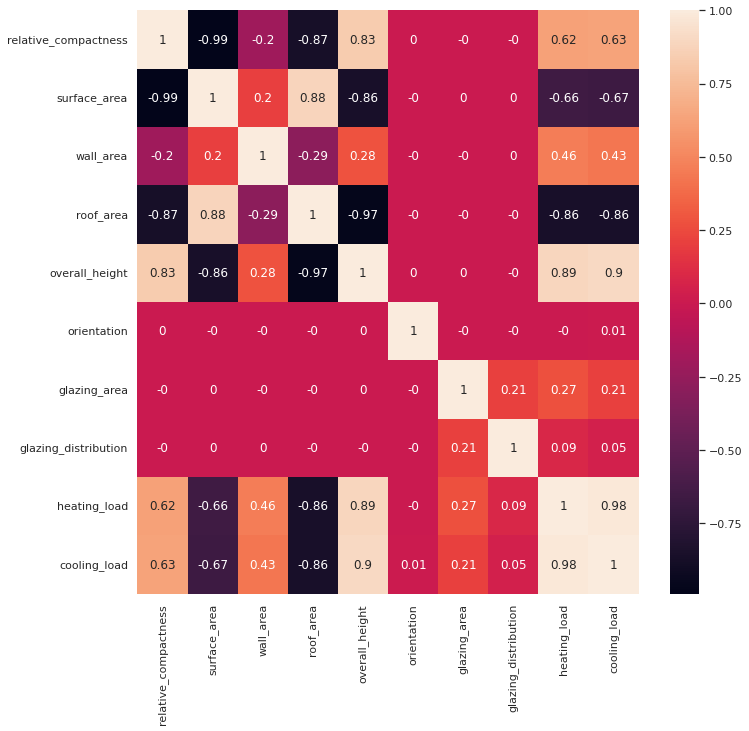

In [281]:
fig, ax = plt.subplots(figsize=(10, 10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Na osnovu korelacione matrice mozemo izvesti neke nove zakljucke, ali i potvrditi neka prethodno pomenute pretpostavke:
* vrednosti matrice koje su oko **0**, nemaju uticaj na heating i cooling load. Npr. mozemo videti da **orientation** ima vrednosti - **0/0.01** za heating/cooling load.
* korelacione vrednosti izmedju **glazing_distribution** i heating/cooling load su takodje male - **0.09/0.05**
* **glazing_area** korelaciona vrednost je malo bliza vrednosti **1**, sto znaci da postoji veoma slaba korelacija - **0.27/0.21**
* korelacija izmedju **heating i cooling load** je **0.98**, sto potvrdjuje razmatranja iz prethodnih koraka, da su u snaznoj korelaciji
* **overall_height** ima jaku pozitivnu korelaciju **0.89/0.9** sa obe nase target vrednosti
* **roof_area ima** jaku negativnu korelaciju **-0.86/-0.86** sa obe nase target vrednosti
* **relative_compactness** i **surface_area** imaju slicne vrednosti, ali suprotnog znaka. **0.62/0.63** za relative_compactness, odnosno, **-0.66/-0.67** za surface_area
* **wall_area** ima vrednost **0.46/0.43**, sto je malo slabije u odnosu na relative compactness na primer.

### FEATURE EXTRACTION TESTS

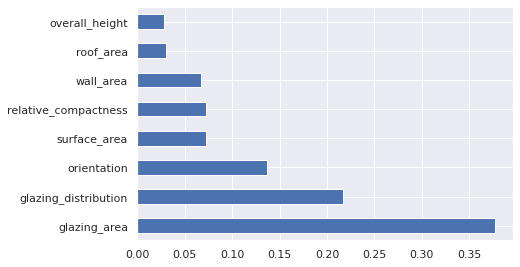

In [311]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y.values.ravel().round(0))
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=3, step=1)
rfe.fit(X, Y)
rfe.ranking_

array([2, 1, 1, 1, 4, 6, 3, 5])

# Residual Errors 

A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# regression coefficients
print('Coefficients: ', lin_model.coef_)
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lin_model.score(X_test, Y_test)))

# plot for residual error
## setting plot style
plt.style.use('fivethirtyeight') 
## plotting residual errors in training data
plt.scatter(lin_model.predict(X_train), lin_model.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(lin_model.predict(X_test), lin_model.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()


A few characteristics of a good residual plot are as follows:
1. It has a high density of points close to the origin and a low density of points away from the origin
2. It is symmetric about the origin